In [1]:
from IPython.display import Image

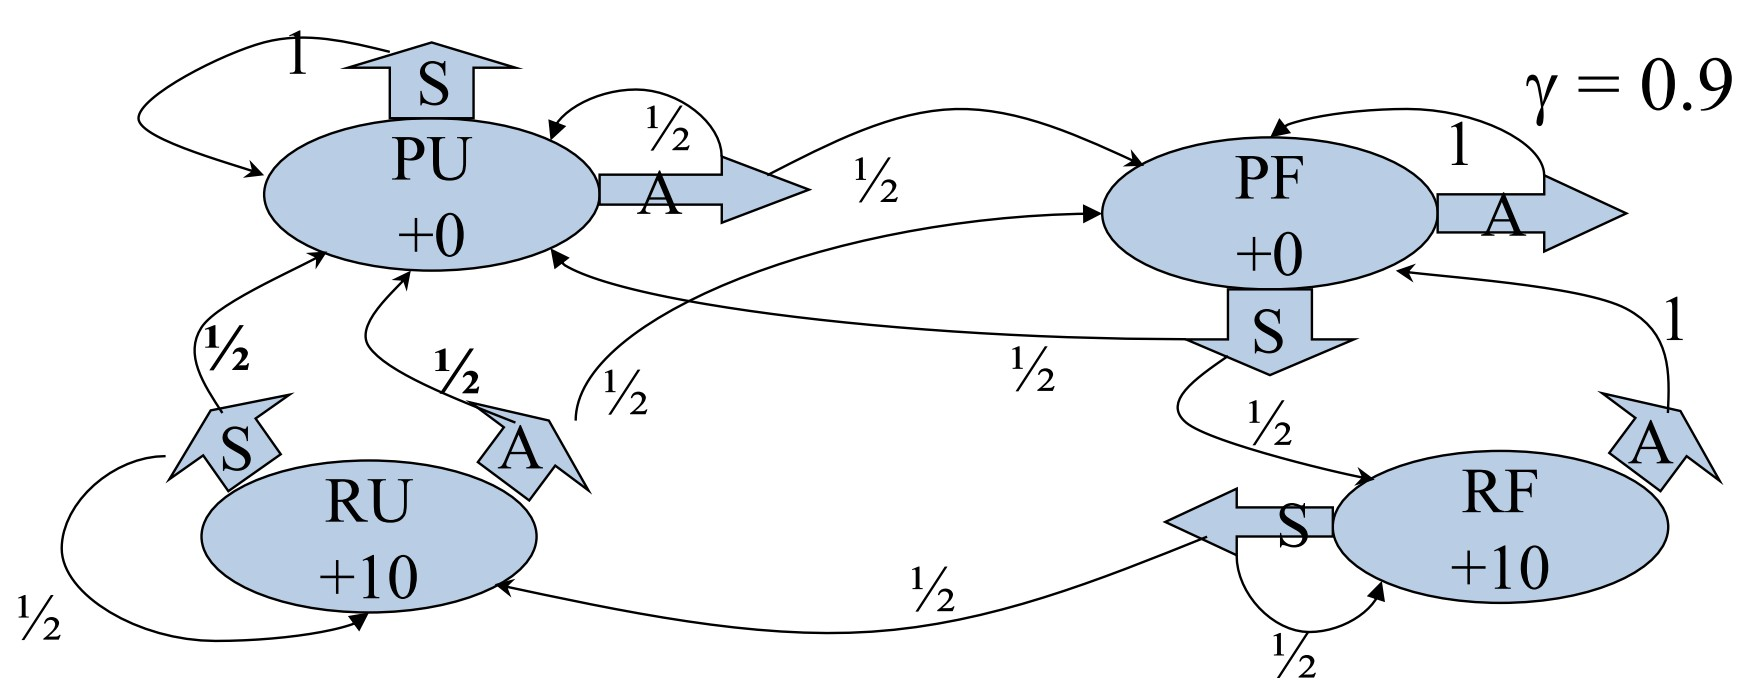

In [2]:
Image(filename='./graph.jpg', width=800) 

# Naive implementation (Dynamic Programming)

Bellman's Equation:
$$ V(s_t) = \max_{a_t} R(s_t, a_t) + \gamma \sum_{s_{t+1}} Pr(s_{t+1} | s_t, a_t)V(s_{t+1})$$
$$ a^{*}_{t} = \arg\max_{a_t} R(s_t, a_t) + \gamma \sum_{s_{t+1}} Pr(s_{t+1} | s_t, a_t)V(s_{t+1})$$

In [3]:
R = {
    'PU': 0,
    'PF': 0,
    'RU': 10,
    'RF': 10
}

actionMap = {
    'PU': {
        'S': {'PU': 1},
        'A': {'PU': 0.5, 'PF': 0.5}
    },
    'PF': {
        'S': {'PU': 0.5, 'RF': 0.5},
        'A': {'PF': 1}
    },
    'RU': {
        'S': {'RU': 0.5, 'PU': 0.5},
        'A': {'PU': 0.5, 'PF': 0.5}
    },
    'RF': {
        'S': {'RU': 0.5, 'RF': 0.5},
        'A': {'PF': 1}
    }
}

decay = 0.9

In [4]:
def Pr(nextState, state, action):
    return actionMap.get(state, 0).get(action, 0).get(nextState, 0)

def argmax(data):
    if not data or len(data) == 0:
        return []
    maxValue = max(data.values())
    return list(filter(lambda x: data[x] == maxValue, data)), maxValue

def Bellman(h, verbose=False):
    V = {}
    V[0] = {
        'PU': 0,
        'PF': 0,
        'RU': 0,
        'RF': 0
    }
    for i in range(1, h + 1):
        if verbose:
            print('-' * 15 + ' iter {} '.format(i) + '-' * 15)
        V[i] = {}
        for state in ['PU', 'PF', 'RU', 'RF']:
            res = {}
            for action in actionMap[state]:
                res[action] = 0
                for nextState in actionMap[state][action]:
                    res[action] += Pr(nextState, state, action) * V[i - 1][nextState]
                pi, maxValue = argmax(res)
            V[i][state] = R[state] + decay * maxValue
            if verbose:
                print('V({}): {:.2f}   Pi: {}'.format(state, V[i][state], pi))
    return V

## Obtain the result in the slides

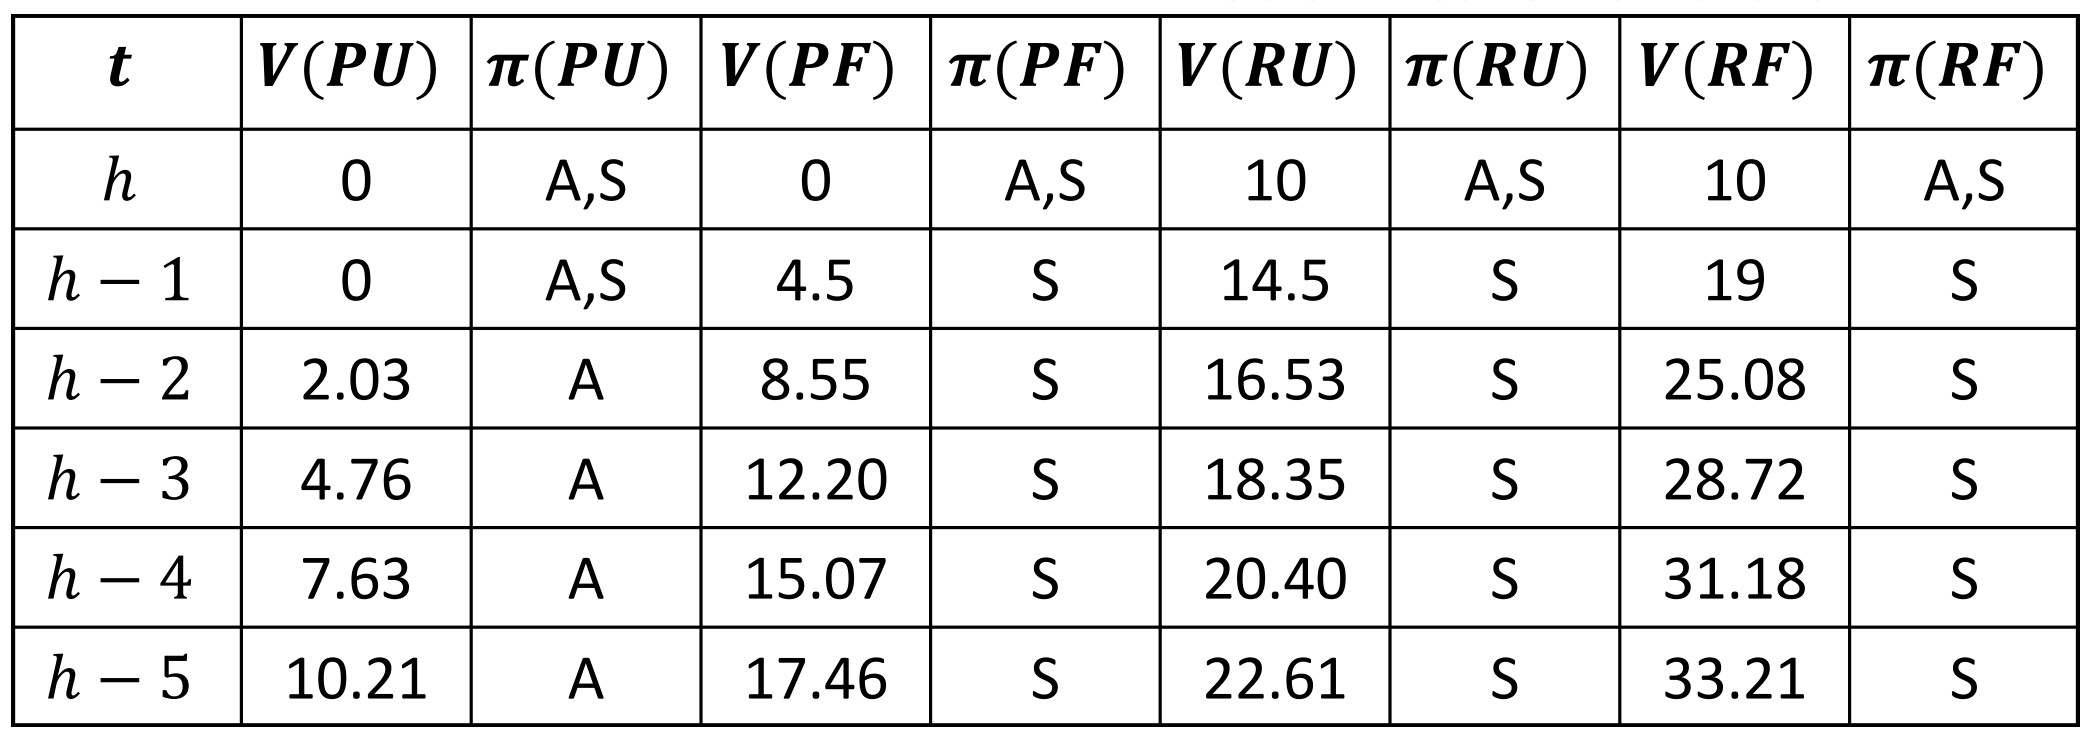

In [5]:
Image(filename='./table.jpg', width=600) 

In [6]:
result = Bellman(6, True)

--------------- iter 1 ---------------
V(PU): 0.00   Pi: ['S', 'A']
V(PF): 0.00   Pi: ['S', 'A']
V(RU): 10.00   Pi: ['S', 'A']
V(RF): 10.00   Pi: ['S', 'A']
--------------- iter 2 ---------------
V(PU): 0.00   Pi: ['S', 'A']
V(PF): 4.50   Pi: ['S']
V(RU): 14.50   Pi: ['S']
V(RF): 19.00   Pi: ['S']
--------------- iter 3 ---------------
V(PU): 2.02   Pi: ['A']
V(PF): 8.55   Pi: ['S']
V(RU): 16.52   Pi: ['S']
V(RF): 25.08   Pi: ['S']
--------------- iter 4 ---------------
V(PU): 4.76   Pi: ['A']
V(PF): 12.20   Pi: ['S']
V(RU): 18.35   Pi: ['S']
V(RF): 28.72   Pi: ['S']
--------------- iter 5 ---------------
V(PU): 7.63   Pi: ['A']
V(PF): 15.07   Pi: ['S']
V(RU): 20.40   Pi: ['S']
V(RF): 31.18   Pi: ['S']
--------------- iter 6 ---------------
V(PU): 10.21   Pi: ['A']
V(PF): 17.46   Pi: ['S']
V(RU): 22.61   Pi: ['S']
V(RF): 33.21   Pi: ['S']


## the convergence of value iteration

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
result = Bellman(100)

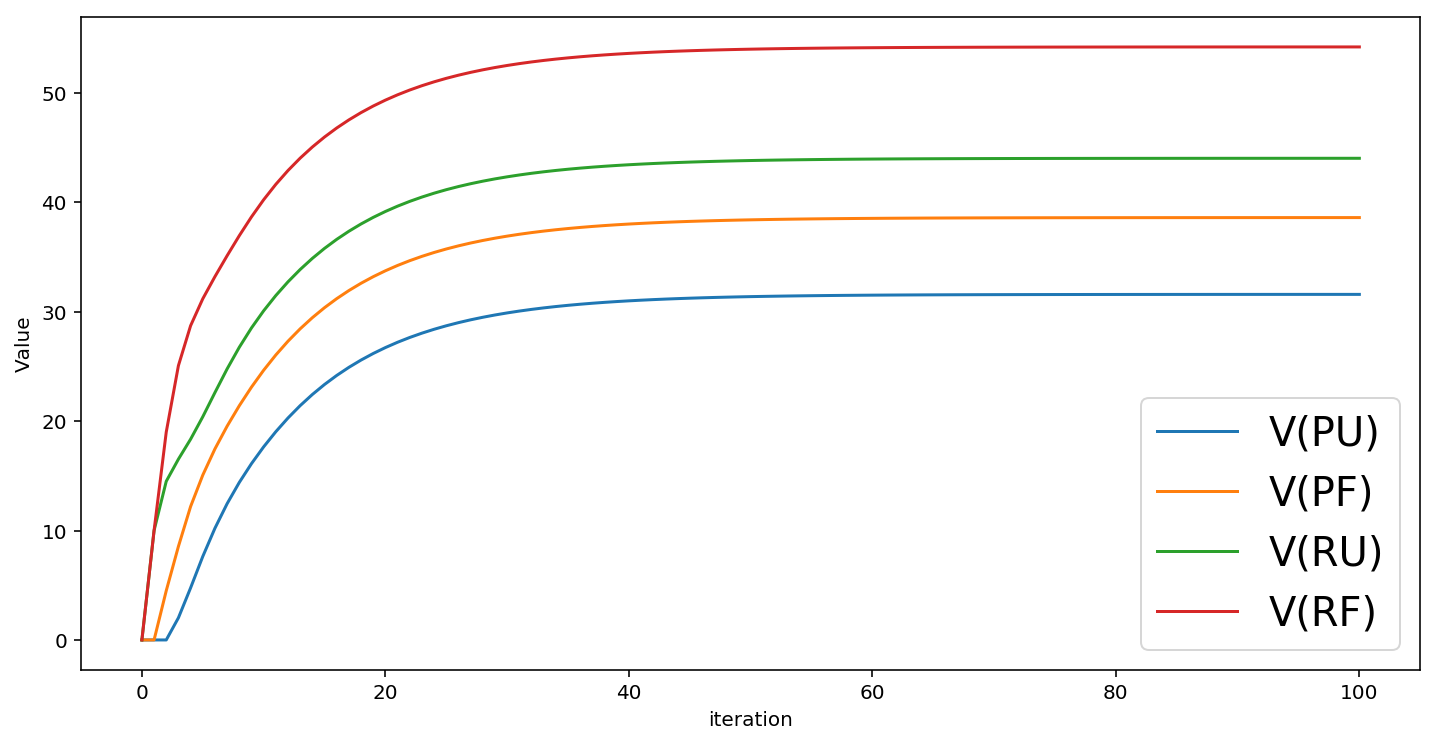

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.xlabel('iteration')
plt.ylabel('Value')
ax.plot([result[i]['PU'] for i in result], label='V(PU)')
ax.plot([result[i]['PF'] for i in result], label='V(PF)')
ax.plot([result[i]['RU'] for i in result], label='V(RU)')
ax.plot([result[i]['RF'] for i in result], label='V(RF)')
legend = ax.legend(loc='lower right', fontsize='20')

# Matrix (numpy) implementation
$$  
s_0 = PU,
s_1 = PF,
s_2 = RU,
s_3 = RF
$$

$$
T^S=\begin{bmatrix}
1 & 0 & 0 & 0 \\
0.5 & 0 & 0 & 0.5 \\
0.5 & 0 & 0.5 & 0 \\
0 & 0 & 0.5 & 0.5 
\end{bmatrix},
T^A=\begin{bmatrix}
0.5 & 0.5 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0.5 & 0.5 & 0 & 0 \\
0 & 1 & 0 & 0 
\end{bmatrix}
$$

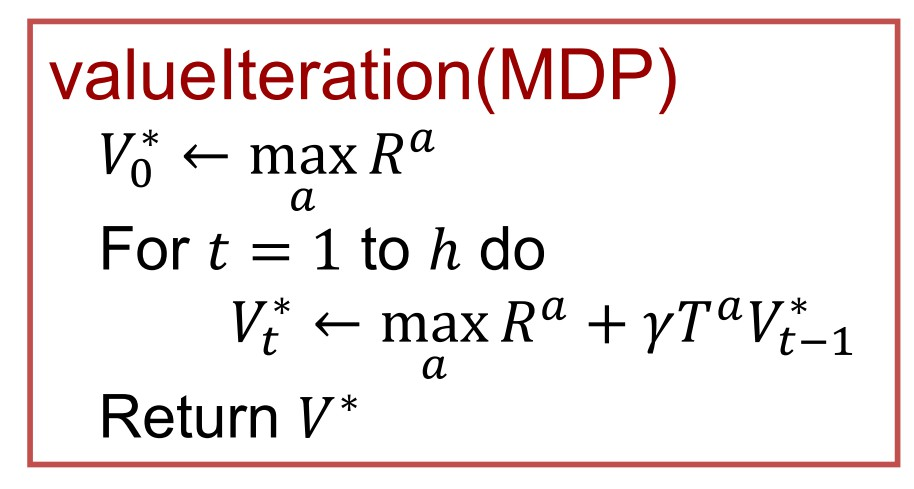

In [10]:
Image(filename='./algo.jpg', width=400) 

In [11]:
import numpy as np

In [12]:
R = np.array([[0, 0, 10, 10]]).T
V = np.array([[0, 0, 0, 0]]).T

In [13]:
T_S = np.array([
    [1  , 0  , 0  , 0  ], 
    [0.5, 0  , 0  , 0.5], 
    [0.5, 0  , 0.5, 0  ], 
    [0  , 0  , 0.5, 0.5]
])
T_A = np.array([
    [0.5, 0.5, 0  , 0  ], 
    [0  , 1  , 0  , 0  ], 
    [0.5, 0.5, 0  , 0  ], 
    [0  , 1  , 0  , 0  ]
])

In [14]:
print('R.shape', R.shape)
print('V.shape', V.shape)
print('T_S.shape', T_S.shape)
print('T_A.shape', T_A.shape)

R.shape (4, 1)
V.shape (4, 1)
T_S.shape (4, 4)
T_A.shape (4, 4)


In [15]:
decay = 0.9

In [16]:
for i in range(6):
    print('-' * 15 + ' iter {} '.format(i) + '-' * 15)
    V_S = R + decay * np.matmul(T_S, V)
    V_A = R + decay * np.matmul(T_A, V)
    V_combined = np.concatenate([V_S, V_A], axis=1)
    V = np.max(V_combined, axis=1).reshape((4, 1))
    print(V)

--------------- iter 0 ---------------
[[ 0.]
 [ 0.]
 [10.]
 [10.]]
--------------- iter 1 ---------------
[[ 0. ]
 [ 4.5]
 [14.5]
 [19. ]]
--------------- iter 2 ---------------
[[ 2.025]
 [ 8.55 ]
 [16.525]
 [25.075]]
--------------- iter 3 ---------------
[[ 4.75875]
 [12.195  ]
 [18.3475 ]
 [28.72   ]]
--------------- iter 4 ---------------
[[ 7.6291875]
 [15.0654375]
 [20.3978125]
 [31.180375 ]]
--------------- iter 5 ---------------
[[10.21258125]
 [17.46430313]
 [22.61215   ]
 [33.21018437]]
